## Criminal Justice and Corrections

I've repeatedly read the statistic that the US makes up around 4% of the global population, but makes up more than 20% of the prison population. In my previous post, I stated that questions are tools for figuring out what's going on. This massive asymmetry is pure question-fuel.

* Why isn't our prison population proportional to our regular population? 
  * Do other countries have fewer criminals? 
  * Do we have a drastically different approach to criminal justice than the rest of the world?
  * Are our prison sentances just much longer?
* What are the most common crimes? 
  * How many people are in for those crimes?
* How many people enter the prison system each month?
  * How many exit?
* Recidivism

    * How many prisoners have been to prison at least once before?
    * What is the recidivism rate for 1st time prisoners who served in public prisons?
    * And for private prisons?
    * Which prisons have the lowest recidivism rates?

With some questions in hand, I can start trying to gather data that could shed light on the situation. I may not be able to get data with the resolution needed to answer some of these questions (eg I may not be able to find data broken down by month).

The government makes some data publicly available. While government data is rarely current, often involves a bit of cleanup, and always involves hunting through old government sites, it's the only source for much of this extremely valuable information. 
From the Bureau of Justice Statistics, I found a government project called the [Prisoner Series](https://www.bjs.gov/index.cfm?ty=pbse&sid=40) and I downloaded the most recent data.

* Federal Prisons (https://www.bop.gov/resources/research_and_reports.jsp)
* Bureau of Justice Prisoners Series 2016 (http://www.bjs.gov/index.cfm?ty=pbdetail&iid=6187)

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import os
%matplotlib inline

## Total Imprisonment Rates (Table p16f01)
The values in the by-race dataset are [per 100k population]

In [188]:
CSV_PATH = os.path.join('data', 'prison', 'p16f01.csv')
total_df = pd.read_csv(CSV_PATH, encoding='latin1', header=12, index_col='Year', parse_dates=['Year'])
total_df.dropna(inplace=True)
total_df.index = total_df.index.values.astype(int)

In [192]:
total_df.head()

,All ages,Age 18 or older
1978,131.0,183.0
1979,133.0,185.0
1980,138.0,191.0
1981,153.0,211.0
1982,170.0,232.0


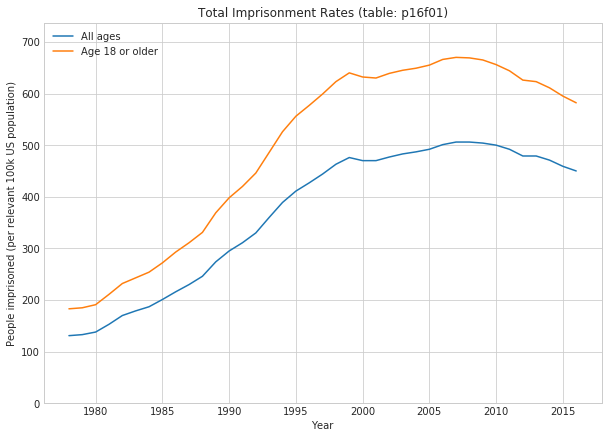

In [191]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(total_df['All ages'])
    ax.plot(total_df['Age 18 or older'])
    ax.set_title('Total Imprisonment Rates (table: p16f01)')
    ax.set_xlabel('Year')
    ax.set_ylabel('People imprisoned (per relevant 100k US population)')
    ax.legend()
    ax.set_ylim([0, 1.1*max([total_df['All ages'].max(), 
                             total_df['Age 18 or older'].max()])])

### Observations
The imprisonment rate normalized to the entire population of US residents is lower than the imprisonment rate normalized to the population of US residents that are 18 or older. This indicates that the imprisonment rate for people under age 18 is much lower than for people 18 or older. That fits with my intuition.

We also see that the imprisonment rate climbs steadily from 1980 up through 1999, dips, and peaks around 2007-2008, at which point it starts trending down.

#### New Questions:
* What was responsible for the increase in the rate of imprisonment? What was responsible for the decrease?
    * Was it proportional to the actual crime rates? 
    * Was it a product of different enforcement policies?
    
To answer these new questions, we will probably have to look at other sets of data.

## Imprisonment by Race (Table p16f02)
Imprisonment rate of sentenced prisoners under the jurisdiction of state or federal correctional authorities, per 100,000 U.S. residents age 18 or older, by race and Hispanic origin, December 31, 2006–2016

In [23]:
CSV_PATH = os.path.join('data', 'prison', 'p16f02.csv')
race_df = pd.read_csv(CSV_PATH, encoding='latin1', header=12)
race_df.dropna(inplace=True)
race_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
race_df.set_index('Year', inplace=True)
race_df

,White/*,Black/*,Hispanic
Year,,,
2006,324.0,2261.0,1073.0
2007,317.0,2233.0,1094.0
2008,316.0,2196.0,1057.0
2009,308.0,2134.0,1060.0
2010,307.0,2059.0,1014.0
2011,299.0,1973.0,990.0
2012,293.0,1873.0,949.0
2013,291.0,1817.0,922.0
2014,289.0,1754.0,893.0


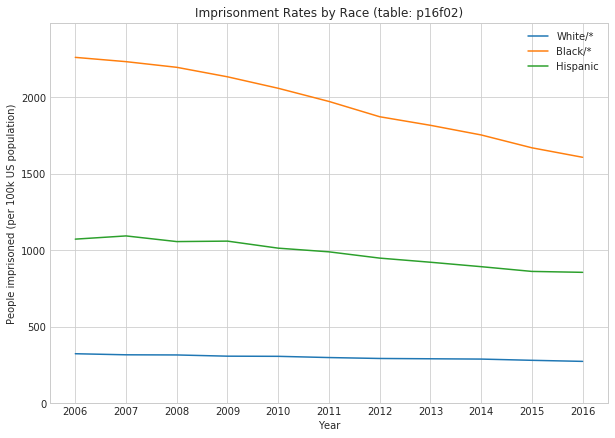

In [172]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(race_df['White/*'])
    ax.plot(race_df['Black/*'])
    ax.plot(race_df['Hispanic'])
    ax.set_title('Imprisonment Rates by Race (table: p16f02)')
    ax.set_xlabel('Year')
    ax.set_ylabel('People imprisoned (per 100k US population)')
    ax.legend()
    ax.set_ylim([0, 1.1*max([race_df['White/*'].max(), 
                         race_df['Black/*'].max(), 
                         race_df['Hispanic'].max()])])

In [80]:
print('{:>8s} imprisonment per 100k US pop: max: {}, min: {}'
      .format('White/*', race_df['White/*'].max(), race_df['White/*'].min()))
print('{:>8s} imprisonment per 100k US pop: max: {}, min: {}'
      .format('Black/*', race_df['Black/*'].max(), race_df['Black/*'].min()))
print('{:>8s} imprisonment per 100k US pop: max: {}, min: {}'
      .format('Hispanic', race_df['Hispanic'].max(), race_df['Hispanic'].min()))
print('*: non-Hispanic')

 White/* imprisonment per 100k US pop: max: 324.0, min: 274.0
 Black/* imprisonment per 100k US pop: max: 2261.0, min: 1608.0
Hispanic imprisonment per 100k US pop: max: 1094.0, min: 856.0
*: non-Hispanic


### Observations
This is very striking. We see that there is a very significant difference in the rates of white (non-Hispanic), black (non-Hispanic), and Hispanic imprisonment. We also see that rates for all three have dropped over this time period.

#### New Questions:
* What is responsible for this difference in imprisonment rates for different demographic groups?

Based on prior research, I suspect that this is the result of many systemic factors, but let's continue exploring the data.

## Breakdown by Gender (Table p16t01)

In [201]:
CSV_PATH = os.path.join('data', 'prison', 'p16t01.csv')
sex_df = pd.read_csv(CSV_PATH, encoding='latin1', header=11, thousands=r',')
sex_df.dropna(inplace=True, thresh=3)
sex_df.dropna(inplace=True, axis=1, thresh=3)
sex_df.dropna(inplace=True)
fix = lambda x: x.split('/')[0]
sex_df['Year'] = sex_df['Year'].apply(fix)
sex_df['Year'] = sex_df['Year'].astype(int)
sex_df.set_index('Year', inplace=True)
sex_df

,Total,Federal/a,State,Male,Female
Year,,,,,
2006,1568674.0,193046.0,1375628.0,1456366.0,112308.0
2007,1596835.0,199618.0,1397217.0,1482524.0,114311.0
2008,1608282.0,201280.0,1407002.0,1493670.0,114612.0
2009,1615487.0,208118.0,1407369.0,1502002.0,113485.0
2010,1613803.0,209771.0,1404032.0,1500936.0,112867.0
2011,1598968.0,216362.0,1382606.0,1487561.0,111407.0
2012,1570397.0,217815.0,1352582.0,1461625.0,108772.0
2013,1576950.0,215866.0,1361084.0,1465592.0,111358.0
2014,1562319.0,210567.0,1351752.0,1449291.0,113028.0


In [205]:
@ticker.FuncFormatter
def y_formatter(x, pos):
    return '{:4.0f}'.format(x/1000)

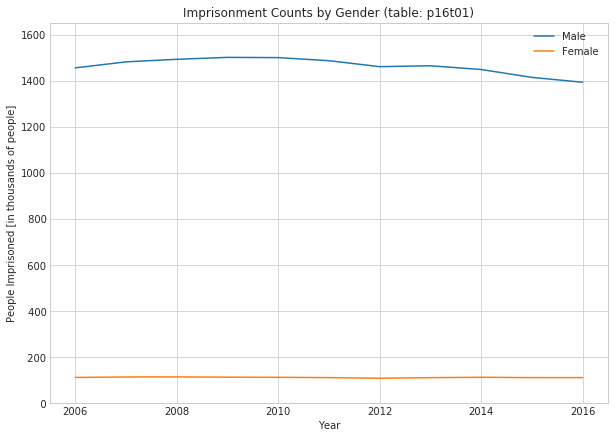

In [208]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(sex_df['Male'])
    ax.plot(sex_df['Female'])
    ax.set_title('Imprisonment Counts by Gender (table: p16t01)')
    ax.set_xlabel('Year')
    ax.yaxis.set_major_formatter(y_formatter)
    ax.set_ylabel('People Imprisoned [in thousands of people]')
    ax.legend()
    ax.set_ylim([0, 1.1*max(sex_df['Male'].max(),
                            sex_df['Female'].max())])

### Observations

The first thing that I notice is that the number of men in prison is much higher than the number of females imprisoned. Per the chart below, over the entire span of the data set (2006 to 2016), there are at least 12 men in prison for each woman in prison. This is a massive asymmetry. It doesn't feel very controversial, but should it? According to the [2010 US Census](https://www.census.gov/prod/cen2010/briefs/c2010br-03.pdf), the US population  is 50.8% female and 49.2% male. 

#### New Questions

* Why are men so much more likely to be in prison?
    * What are the relevant differences between men and women?
    * What is the gender breakdown of crimes?

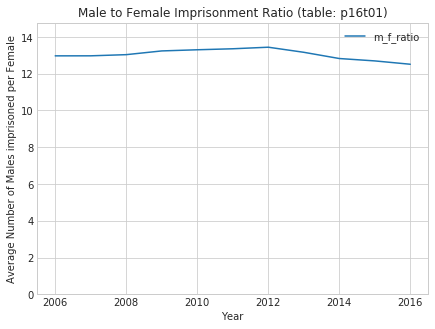

In [217]:
sex_df['m_f_ratio'] = sex_df['Male'] / sex_df['Female']
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(sex_df['m_f_ratio'])
    ax.set_title('Male to Female Imprisonment Ratio (table: p16t01)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Number of Males imprisoned per Female')
    ax.legend()
    ax.set_ylim([0, 1.1*sex_df['m_f_ratio'].max()])

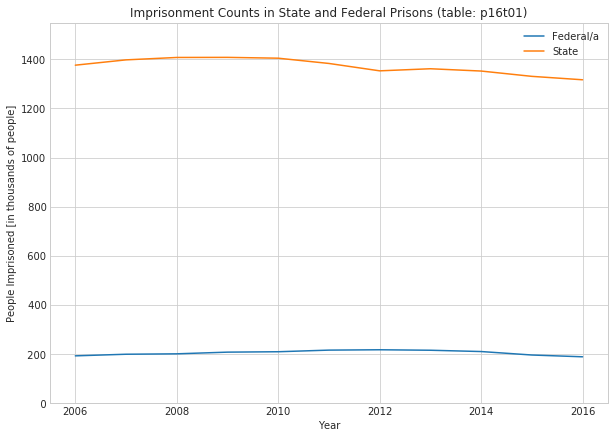

In [219]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(sex_df['Federal/a'])
    ax.plot(sex_df['State'])
    ax.set_title('Imprisonment Counts in State and Federal Prisons (table: p16t01)')
    ax.set_xlabel('Year')
    ax.yaxis.set_major_formatter(y_formatter)
    ax.set_ylabel('People Imprisoned [in thousands of people]')
    ax.legend()
    ax.set_ylim([0, 1.1*max(sex_df['Federal/a'].max(),
                            sex_df['State'].max())])

### Observations

Far more people are in State prisons than are in Federal prisons. That isn't very controversial and at this level, I won't dig much deeper. It may be interesting to dig further into imprisonment counts broken down by state.